<a href="https://colab.research.google.com/github/ji0-k/AI_26/blob/main/05_02_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_%EA%B7%B8%EB%A6%AC%EB%93%9C%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 지금까지 배운 알고리즘은 훈련세트와 테스트세트를 나누어평가를 진행하는데
# 근데 결국 테스트세트로 평가를 하면 테스트세트에 맞는 모델이 만들어 지는 결론이 나온다
# 테스트 세트에 일반화 성능을 올바르게 예측하려면 가능한 한
# 테스트세트를 사용하지 말아야 한다.
# 모델을 만들고 나서 마지막에 딱 한번 사용하는 것이 좋다.

# 결정트리에서 배운 max_depth=3으로 테스트 해봤는데 이것이 최선일까?
# 결정트리에서 max_depth 매개변수를 사용한 하이퍼파라미터 튜닝 해보자.

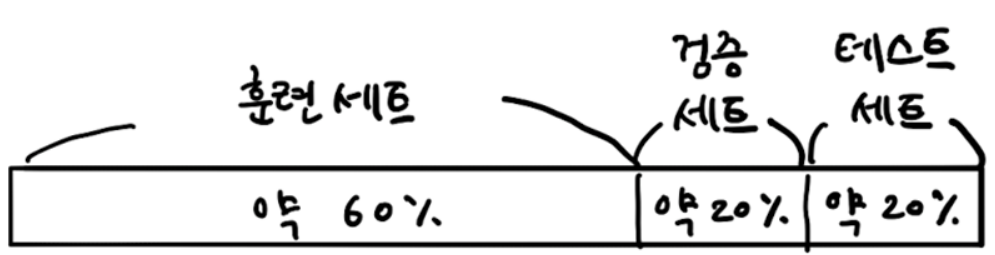

In [ ]:
# 검증세트
# 테스트 세트를 사용하지 않으려면 모델이 과대적합인지
# 과소적합인지 판단하기 어렵다.
# 테스트 세트를 사용하지 않고 측정하는 간단한 방법은
# 훈련세트를 또 나누는 것이다.
# 훈련세트 60%, 검증세트 20%, 테스트세트 20% -> 실무에서 많이 쓰는 기법

# 테스트하고 싶은 매개변수를 바꿔가면서 가장 좋은 모델이 나올 수 있음
# 이 매개변수를 사용해 훈련세트와 검증세트를 합쳐
# 전체 훈련 데이터에서 모델을 다시 훈련함
# 마지막 테스트에서 최종 점수를 평가함
# 훈련세트에서 모델을 훈련하고 검증세트로 모델을 평가함.
# 마지막 세트에서 테스트세트를 이용해 최종 점수를 평가함.

In [ ]:
# 1.교차 검증 (Cross Validation):
# 보통 훈련 세트에서 또다시 '검증 세트'를 떼어내어 모델을 평가하는데, 데이터가 적으면 검증 결과가 불안정할 수 있습니다.
# 교차 검증은 데이터를 여러 조각으로 나눠서 번갈아가며 검증에 사용하여, 모델의 성능을 훨씬 더 객관적으로 측정하게 해줍니다.

# 2 그리드 서치 (Grid Search):
# 결정 트리의 max_depth처럼 사람이 직접 설정해야 하는 값을 하이퍼파라미터라고 합니다.
# 그리드 서치는 "내가 준 후보 값들 중에서 가장 성능이 좋은 최적의 하이퍼파라미터 조합을 자동으로 찾아줘!"라고 컴퓨터에게 시키는 도구입니다.

# 3.
# 훈련 세트(sub): 모델을 가르치는 용도 (공부하기)
# 검증 세트(val): 공부가 잘됐는지 중간 고사 보는 용도 (하이퍼파라미터 튜닝)
# 테스트 세트(test): 최종 수능 시험 (실전 투입 전 마지막 성능 확인)

In [3]:
import pandas as pd

# 1. 온라인에서 와인 데이터셋(CSV)을 읽어와 데이터프레임으로 저장합니다
wine = pd.read_csv('https://bit.ly/wine_csv_data')

# 2. 특성 데이터(알코올, 당도, pH)와 정답 데이터(class: 화이트/레드)를 넘파이 배열로 변환합니다.
data = wine[['alcohol','sugar','pH']].to_numpy() # 입력데이터(특성)
target =wine['class'].to_numpy() #타겟데이터(정답)

from sklearn.model_selection import train_test_split
# 3. 전체 데이터를 훈련 세트와 테스트 세트로 나눕니다.

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
# test_size=0.2 : 전체의 20%를 최종 성능 확인용(테스트 세트)으로 떼어둡니다.
# random_state=42 : 실행할 때마다 결과가 달라지지 않도록 무작위 수를 고정합니다.
# 원본 데이터 6497개 중 약 80%인 5197개가 훈련용, 20%인 1300개가 테스트용이 됩니다.

print(train_input.shape, test_input.shape) # 4. 분할된 데이터의 차원(개수, 특성 수)을 확인합니다.


(5197, 3) (1300, 3)


In [4]:
# 검증용데이터 20% 생성
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state=42)
# 훈련 세트(train_input)를 다시 8:2로 나누어 '실제 훈련용(sub)'과 '검증용(val)'으로 분리합니다.
# test_size=0.2를 통해 훈련 데이터 5197개 중 20%인 1040개를 검증 세트로 떼어냅니다.
print(sub_input.shape, val_input.shape)
# 분할 후 데이터의 크기를 확인합니다.
# sub_input: 실제 모델 학습에 사용하는 데이터 (4157개)
# val_input: 학습 중 모델의 성능을 중간 점검하는 데이터 (1040개)

(4157, 3) (1040, 3)


In [8]:
from sklearn.tree import DecisionTreeClassifier
# sub_input, sub_target과 val_input, val_target을 사용해 모델을 만들고 평가함

dt= DecisionTreeClassifier(random_state=42)
# 1. 결정 트리 모델 객체를 생성합니다.
# random_state=42는 실행할 때마다 결과가 달라지지 않게 '난수'를 고정하는 역할이에요.
dt.fit(sub_input,sub_target)
# 2. 모델을 학습(fit)시킵니다.
# 훈련 세트(sub_input)와 그에 맞는 정답(sub_target)을 주어 규칙을 배우게 합니다.

print(dt.score(sub_input,sub_target))
# 3. 훈련 세트에서의 성능 점수(정확도)를 확인합니다.
# 출력 결과 약 99.71%가 나옵니다. 모델이 훈련 데이터를 거의 다 외웠다는 뜻이에요. (과대적합
print(dt.score(val_input, val_target))
# 4. 검증 세트에서의 성능 점수를 확인합니다.
# 출력 결과 약 86.44%가 나옵니다. 훈련 점수보다 약 13%나 낮죠?
# 이는 모델이 '새로운 데이터(검증용)'에는 약하다는 증거입니다.

# 5. [결론] 두 점수 차이가 크므로, 나무의 깊이(max_depth) 같은 매개변수를 조절해서
# 훈련 점수는 조금 낮아지더라도 검증 점수를 끌어올리는 '일반화' 과정이 필요합니다.

0.9971133028626413
0.864423076923077


In [ ]:
# 검증세트를 만드느냐고 훈련 세트가 줄었음. (이럴때 많은 데이터를 훈련하면 좋은 결과가 나옴)
# 교차 검증 : 검증 세트를 떼어 내어 평가하는 과정을 여러번 반복함
# [훈련세트, 훈련세트, 검증세트]
# [훈련세트, 검증세트, 훈련세트]
# [검증세트, 훈련세트, 훈련세트] -> 패리티 방식(3-폴드 교차 검증)
# 5-폴드, 10-폴드도 있음
# 사이킷런에는 cross_validate()라는 교차 검증 함수를 사용

In [15]:
# 1. 교차 검증을 위한 도구를 임포트합니다.
from sklearn.model_selection import cross_validate
import numpy as np # 평균 계산을 위해 함께 임포트합니다.

# 2. 교차 검증을 실행합니다.
scores = cross_validate(dt, train_input,train_target)
# dt: 사용할 결정 트리 모델
# train_input, train_target: '검증 세트'로 나누기 전의 전체 훈련 데이터를 넣습니다.
# 내부적으로 데이터를 5개 조각(Fold)으로 나누어 5번 학습과 검증을 반복합니다.
# scores = cross_validate(dt, train_input, train_target, cv=5)
# cv 매개변수를 이용해 폴드 수를 변경함 cv=5(기본값)

# 3. 수행 결과가 담긴 딕셔너리 객체를 확인합니다.
print(scores)
# 학습 시간(fit_time), 검증 시간(score_time), 검증 점수(test_score)

# 4. 5번의 교차 검증 점수의 평균을 냅니다.
print(np.mean(scores['test_score']))
# 5개의 검증 점수를 평균을 내어 최종 점수를 얻는다. 85.53%
# 이것이 모델의 최종 '진짜 실력'이라고 볼 수 있습니다.

{'fit_time': array([0.01230597, 0.01202893, 0.01377964, 0.01234627, 0.01179695]), 'score_time': array([0.00171256, 0.001616  , 0.00171828, 0.00180316, 0.00172091]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
0.855300214703487


In [ ]:
# 주의 : cross_validate()는 훈련세트를 섞어서 폴드를 나누지 않음 -> 분할기 사용(splitter)
# 앞서 우리는 tarin_test_split() 함수로 전체 데이터를 섞은 후 훈련세트를 준비했음
# 만약 교차 검증을 할 때 훈련세트를 섞으려면 분할기(splitter)를 지정해야 한다.

# 사이킷런의 분할기는 교차검증에서 폴드를 어떻게 나눌지를 결정함
# cross_validate()는 기본적으로 회귀모델인 KFold 분할기를 사용함
# 분류 모델일 경우 타킷 클래스를 골고루 나누기 위해서 StratifiedKFold를 사용한다.

In [19]:
from sklearn.model_selection import StratifiedKFold
# StratifiedKFold는 타깃(정답)의 비율을 원래 데이터와 동일하게 유지하면서 조각을 나눕니다.
# 분류(Classification) 모델에서는 필수적으로 사용되는 기법입니다

# 1. splitter라는 이름으로 StratifiedKFold 객체를 만듭니다.
splitter = StratifiedKFold()
# 기본적으로 5-폴드(n_splits=5)로 설정됩니다.

# 2. 교차 검증을 실행합니다.
scores = cross_validate(dt, train_input, train_target, cv= splitter)
# cv=splitter: "그냥 나누지 말고, 내가 설정한 splitter 방식(계층화)으로 나눠줘"라고 지정합니다.
# train_input과 train_target을 넣어 데이터의 정답 비율을 참고하게 합니다.

# 3. 5번의 교차 검증 결과(딕셔너리 형태)를 출력합니다.
print(scores)

# 왜 splitter를만드나?
# 사실 앞선 코드에서 cv를 생략해도 분류 모델이면 자동으로 StratifiedKFold가 작동합니다.
# 하지만 조각 개수를 늘리고 싶거나(n_splits=10), 데이터를 섞고 싶을 때(shuffle=True)는
# 위 코드처럼 객체를 따로 만들어 넣어줘야 세밀한 조정이 가능합니다.

print(np.mean(scores['test_score']))
# 훈련 결과: 출력된 test_score 값들이 이전보다 더 안정적으로(비슷한 수치로) 나온다면,
# 데이터가 골고루 잘 섞여서 검증되었다는 뜻입니다.

{'fit_time': array([0.0099082 , 0.00845027, 0.00896311, 0.00917435, 0.00837946]), 'score_time': array([0.00128317, 0.00116086, 0.00135899, 0.00120521, 0.00121284]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
0.855300214703487


In [20]:
# 왜 splitter 사용전과 후가 똑같은 평균인지 질문함
# : splitter를 직접 만들어서 세부 옵션을 건드렸을 때 비로소 점수가 달라집니다

# 1. 조각 개수나 섞기 옵션을 변경하고 싶을 때 직접 객체를 생성합니다.
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# n_splits=10: 5번이 아니라 10번 시험을 보겠다!
# shuffle=True: 데이터를 나누기 전에 한 번 골고루 섞겠다!

# 2. 변경된 설정으로 교차 검증 실행
scores = cross_validate(dt, train_input, train_target, cv=splitter)

# 3. 평균 점수 확인
print(np.mean(scores['test_score']))
# 조각 개수가 달라지고 데이터 섞기가 포함되었으므로, 이때는 점수가 이전과 다르게 나옵니다.

# cross_validate(cv=None) 일 때:
   # 사용하는 모델이 분류(Classification) 모델이면?
   #      → 자동으로 StratifiedKFold를 사용하여 데이터를 나눕니다.
   # 사용하는 모델이 회귀(Regression) 모델이면?
   #      → 자동으로 일반 KFold를 사용하여 데이터를 나눕니다.

0.8574181117533719


In [23]:
# 데이터 섞기(shuffle)와 폴드 개수(n_splits) 조절을 통해 교차 검증을 한 단계 더
# n_splits=10: 데이터를 5개가 아닌 10개 조각으로 나눕니다.
#  더 많은 검증 과정을 거치므로 모델의 성능 평가가 더 정밀해지지만, 연산 시간은 그만큼 늘어납니다.
# shuffle=True: 데이터를 나누기 전에 전체적으로 한 번 뒤섞습니다.
#  만약 원본 데이터가 특정 순서(예: 날짜순, 당도순)로 정렬되어 있다면, 이를 섞어줘야 각 조각이 전체 데이터를 잘 대표할 수 있습니다.
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np

# 1. 10개의 조각으로 나누고, 데이터를 미리 섞는 상세 설정의 splitter를 만듭니다.
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# n_splits=10: 교차 검증을 10번 수행하도록 설정합니다.
# shuffle=True: 데이터를 나누기 전에 무작위로 섞어 데이터의 편향을 방지합니다.
# random_state=42: 섞는 순서를 고정하여 코드를 다시 실행해도 같은 결과를 얻게 합니다.

# 2. 설정한 splitter를 사용하여 교차 검증을 수행합니다.
scores = cross_validate(dt, train_input, train_target,cv=splitter)
# 이제는 5번이 아니라 10번의 학습과 검증이 반복됩니다.

# 3. 10번의 교차 검증 결과가 담긴 딕셔너리를 출력합니다.
print(scores)
# test_score 항목에 10개의 점수가 들어있을 것입니다.

# 4. 10번의 검증 점수를 평균 내어 최종 성능을 확인합니다.
print(np.mean(scores['test_score']))
# 5-폴드 결과(85.53%)와는 조금 다른 85.74%라는 결과가 나옵니다.
# 데이터가 섞이고 평가 횟수가 늘어났기 때문에 더 믿을만한 '평균 점수'입니다.

{'fit_time': array([0.01287651, 0.00960588, 0.00985932, 0.00947475, 0.00924778,
       0.0094893 , 0.00951672, 0.01031494, 0.00930357, 0.00925875]), 'score_time': array([0.0011797 , 0.00111246, 0.00104809, 0.00104594, 0.00112748,
       0.00099802, 0.00097203, 0.00104499, 0.00093865, 0.00095582]), 'test_score': array([0.83461538, 0.87884615, 0.85384615, 0.85384615, 0.84615385,
       0.87307692, 0.85961538, 0.85549133, 0.85163776, 0.86705202])}
0.8574181117533719


In [ ]:
# 결정트리의 매개변수 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾아봐야 함
# 테스트 세트를 사용하지 않고 교차 검증을 통해서 좋은 모델을 골라야 함

# 하이퍼파라미터 튜닝
# 모델 파라미터 : 머신런닝 모델이 학습하는 파라미터
# 하이퍼파라미터 : 사용자가 지정해야만 하는 파라미터
# 하이퍼파라미터 튜닝 : 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련
# 그 다음 검증세트의 점수나 교차 검증을 통해서 매개변수를 조금씩 변경 1~2, 5~6개의 매개변수를 제공
# AutoML : 사람의 개입없이 하이퍼파라미터 튜닝을 자동으로 수행하는 기술

# Max_depth 를 최적으로 고정하고 min_sample_split을 바꿔가며 최적의 값을 찾는다면 값이 함께 변경됨
# -> 두개의 매개변수를 동시에 바꿔가며 최적의 값을 찾아야 함 -> 다중 for문을 사용해야 됨(복잡해 짐)
# 사이킷런에서 제공하는 그리드 서치(Grid Search)가 제공 GridSearchCV


In [ ]:
#1. 그리드 서치(Grid Search)란?
# 우리가 결정 트리의 깊이나 불순도 감소량을 일일이 숫자로 넣어보며 점수를 확인하는 것은 매우 번거롭습니다.
# 그리드 서치는 우리가 준 후보 리스트(params)를 격자(Grid)처럼 만들어서
# 모든 조합을 다 테스트해보고, 가장 성적이 좋은 모델을 골라주는 자동화 도구입니다.

In [24]:
from sklearn.model_selection import GridSearchCV #교차 검증을 동시에 수행하는 도구

# 1. 탐색할 하이퍼파라미터와 그 후보군을 딕셔너리로 만듭니다.
params = {'min_impurity_decrease': [0.0001,0.0002, 0.0003, 0.0004, 0.0005]}
# min_impurity_decrease: 노드를 분할하기 위한 최소 불순도 감소량
# (이 수치보다 작게 불순도가 감소한다면 더 이상 가지를 치지 않습니다.)

# 2. 그리드 서치 객체를 생성합니다.
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
# DecisionTreeClassifier(random_state=42): 분석할 기본 모델
# params: 위에서 정의한 매개변수 후보 리스트
# n_jobs=-1: 모든 CPU 코어를 사용하여 병렬로 빠르게 계산합니다.


gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [25]:
print(f"그리드 서치를 통해 찾은 최적의 모델의 정확도 : {gs.score(train_input, train_target)*100:.2f}%")

그리드 서치를 통해 찾은 최적의 모델의 정확도 : 96.15%
